In [45]:
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import numpy as np

from collections import Counter

In [58]:
# generate the training and test datasets

numExamples = 1500
numFeatures = 2

numTestSamples = int(0.4*numExamples)
radDist = 72.0 # points > radDist are in class_1, points <= radDist are in class_0

k = 10 # size of the electorate (i.e. number of voting neighbors)

xmin = -100.0
xmax = 100.0
x =  xmin + (xmax-xmin)*np.random.rand(numExamples,numFeatures) # training data

dd = (np.sum(x**2, 1)**0.5) # euclidean distances of the training data from origin
cc = np.where(dd>radDist, 1,0) # class assignment of the training data based on Euclidean distance

xtest = xmin + (xmax-xmin)*np.random.rand(numTestSamples,numFeatures) # test data

ddTest = (np.sum(xtest**2, 1)**0.5) # euclidean distances of the test data from origin
ccTest = np.where(ddTest>radDist, 1,0) # class assignment of the test data based on Euclidean distance

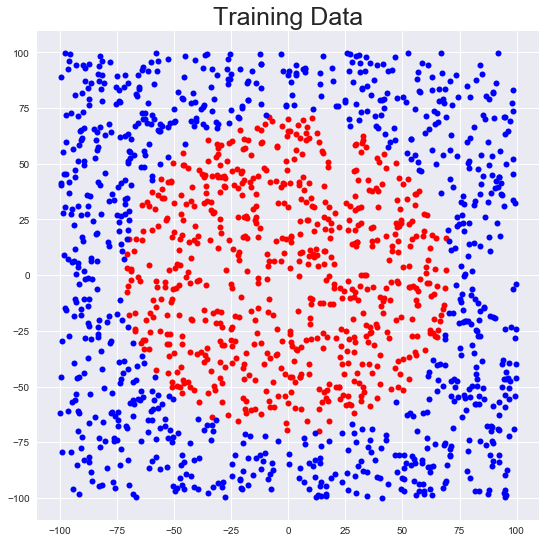

In [59]:
plt.figure(figsize=[9,9])

clrs = ['r', 'b']

for i in set(cc):
    xx = x[cc==i]
    plt.plot(xx[:,0], xx[:,1], '.', color =clrs[i], markersize=12)
plt.title('Training Data', fontsize=25)
plt.show()

In [60]:
# function for evaluating Euclidean distances
def getDistances(testExample, trainData):
    d = trainData-testExample
    return np.sum(d**2, 1)**0.5

# function for class voting
def voteClass(arrayOfDists, k, train_Label):
    nrst = np.argpartition(arrayOfDists,range(len(arrayOfDists)))[:k]
    return Counter(train_Label[nrst]).most_common(1)[0][0]

In [61]:
# get predictions for the test data
testClasses = np.array([voteClass(getDistances(i, x), k, cc) for i in xtest])

In [62]:
print 'Prediction Accuracy of Test Data:', 100.0*sum(testClasses == ccTest)/testClasses.shape[0], '%'

Prediction Accuracy of Test Data: 96.8333333333 %


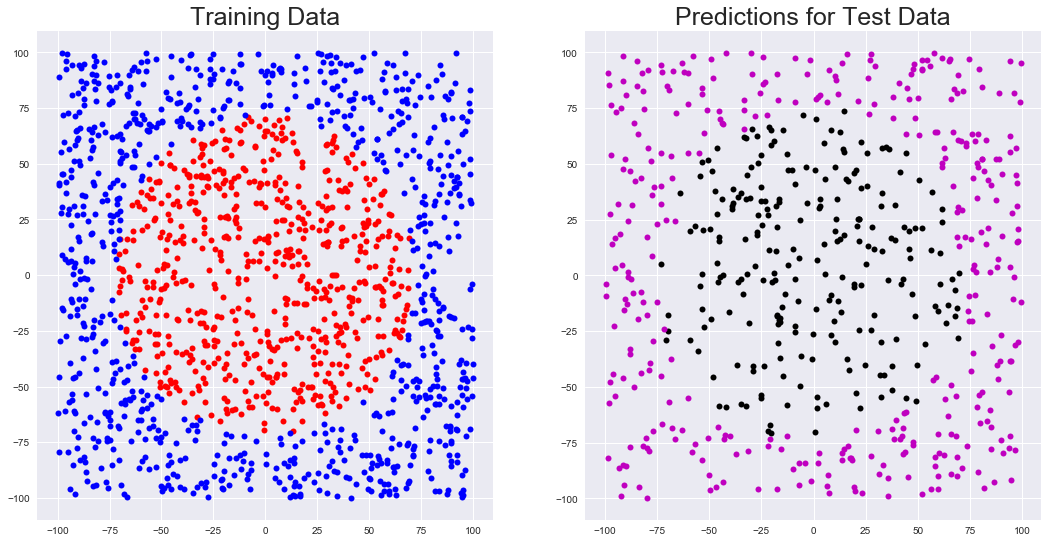

In [63]:
plt.figure(figsize=[18,9])

clrs = ['r', 'b']
clrs2 = ['k', 'm']

plt.subplot(121)
plt.title('Training Data', fontsize=25)
for i in set(cc):
    xx = x[cc==i]
    plt.plot(xx[:,0], xx[:,1], '.', color =clrs[i], markersize=12)
    
plt.subplot(122)
plt.title('Predictions for Test Data', fontsize=25)
for i in set(cc):
    xt = xtest[testClasses==i]
    plt.plot(xt[:,0], xt[:,1], '.', color =clrs2[i], markersize=12)
    
plt.show()

In [64]:
theRes = []

for j in range(1,numExamples+1,5):
    thisTrainClass = np.array([voteClass(getDistances(i, x), j, cc) for i in x])
    thisAccuracy = 100.0*sum(thisTrainClass == cc)/thisTrainClass.shape[0]
    theRes.append((j, thisAccuracy))
    
theRes = np.array(theRes)

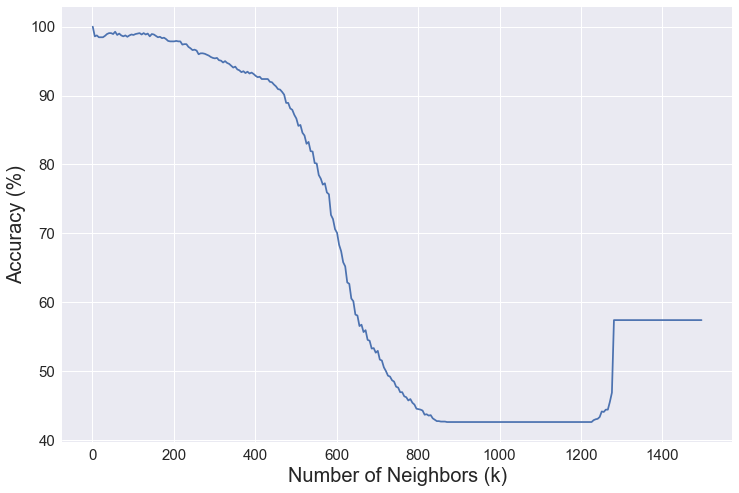

In [65]:
plt.figure(figsize=[12,8])
plt.plot(theRes[:,0], theRes[:,1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Neighbors (k)', fontsize = 20)
plt.ylabel('Accuracy (%)', fontsize = 20)
plt.show()